In [112]:
"""Градиентный спуск для парной линейной регрессии"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
x = pd.read_csv('assets/data/ML1.1 linear regression/data/x.csv',
                index_col=0)['0']
y = pd.read_csv('assets/data/ML1.1 linear regression/data/y.csv',
                index_col=0)['0']

In [102]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [103]:
x.shape, y.shape

((20,), (20,))

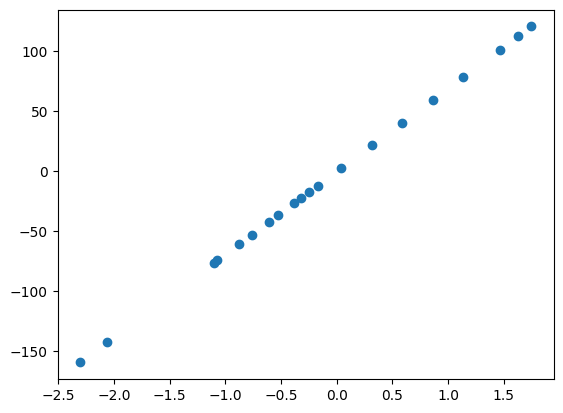

In [104]:
plt.figure()
plt.scatter(x, y)
plt.show()

Формула среднеквадратичной ошибки:

![Среднеквадратичная ошибка](assets/images/sh_0019.png)

In [105]:
class Model():
    """Модель парной линейной регрессии y = b0 + b1 * x"""

    def __init__(self, max_iter = 50, tolerance = 0.000001):
        """Начальные значения коэффициентов"""
        self.b0 = 0
        self.b1 = 0
        self.max_iter = max_iter
        self.tolerance = tolerance

    def predict(self, x):
        """Предсказание значения по подобранным коэффициентам"""
        return self.b0 + self.b1 * x

    def error(self, x, y):
        """Расчет ошибки по формуле J = y_pred - y_true, в качестве аргументов может быть передано не отдельное значение, а серия"""
        return sum((self.predict(x) - y) ** 2) / (2 * len(y))

    def fit(self, x, y):
        """Функция обучения"""
        # Скорость обучения, не должна быть слишком большой, иначе градиентный спуск может разойтись.
        # Однако если корректировать это значение по ошибке, то можно брать и большое.
        alfa = 100
        # Данные для построения кривой обучения
        errors = [self.error(x, y)]
        for _ in range(self.max_iter):
            dJ0 = sum(self.predict(x) - y) / len(y)
            dJ1 = sum((self.predict(x) - y) * x) / len(y)
            self.b0 -= alfa * dJ0
            self.b1 -= alfa * dJ1
            
            # Коррекция alfa + возврат в исходную точку градиентного спуска.
            new_err = self.error(x, y)
            old_err = errors[-1]
            
            if new_err > old_err:
                alfa /= 2
                self.__init__()
            errors.append(new_err)
            
            # Модель достаточно обучена, выходим.
            if abs(old_err - new_err) < self.tolerance:
                break
        else:
            # Произошло "недообучение". Jupyter Notebook выводит "Warning" почему-то не в этом блоке, а через несколько блоков ниже.
            print("Warning! Обучение произошло не до конца.")
        
        return errors

In [106]:
model = Model(max_iter=100)
print("Начальная ошибка: ", model.error(x, y))

Начальная ошибка:  2937.6446095153406


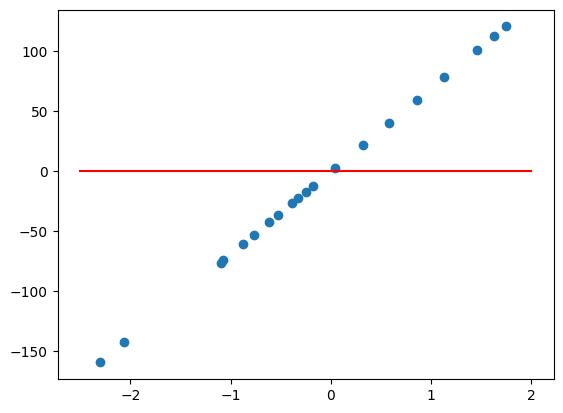

In [107]:
plt.figure()
plt.scatter(x, y)

# Пробуем построить график, причем используем не исходные данные, а сгенерированные!
# Это помогает избегать ошибок на более сложных функциях.
x_pred = np.linspace(-2.5, 2, 100)
y_pred = model.predict(x_pred)

plt.plot(x_pred, y_pred, 'r')
plt.show()

In [108]:
# Видно, что теоретически предсказанные значения далеки от реальных.
# Нужно обучить модель!

errors = model.fit(x, y)
print("Конечная ошибка: ", model.error(x, y))

Конечная ошибка:  1.8566225588516855e-08


[2937.6446095153406, 11069028.375580147, 2678257.510274597, 2517341822.6981606, 626166.2024869978, 137846524.23824996, 135944.07980949193, 6523915.891141288, 24788.901274812473, 219259.03332088207, 2700.2827084911173, 2706.528290841108, 28.216100585031207, 2.0003685023982145, 0.14243775616085216, 0.010142418799187303, 0.0007222007849653653, 5.142500858345861e-05, 3.66176770070441e-06, 2.607397269032591e-07, 1.8566225588516855e-08]


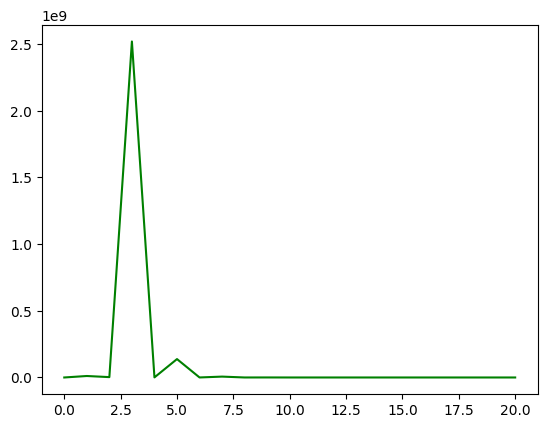

In [109]:
# Кривая обучения
print(errors)
plt.plot(errors, 'g')

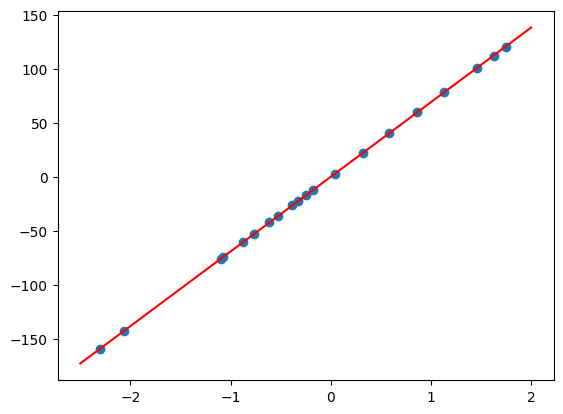

In [110]:
# Этот код дублирует код выше
plt.figure()
plt.scatter(x, y)

# Пробуем построить график, причем используем не исходные данные, а сгенерированные!
# Это помогает избегать ошибок на более сложных функциях.
x_pred = np.linspace(-2.5, 2, 100)
y_pred = model.predict(x_pred)

plt.plot(x_pred, y_pred, 'r')
plt.show()